In [2]:
import pandas as pd
import natsort as ns
import numpy as np
import nltk
import os
import fakenewsanalyzerptbr as fna
import string
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
path = 'data'
dataset_csv = 'real_and_fake_news_corpus_pt_br.csv'

In [4]:
news = pd.read_csv(os.path.join(path, dataset_csv))

In [5]:
news.head(2)

,Id,news_text_full,news_text_normalized,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,...,number_of_plural_first_personal_pronouns,number_of_pronouns,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity,Tag
0,1-FAKE,Kátia Abreu diz que vai colocar sua expulsão e...,Kátia Abreu diz que vai colocar sua expulsão e...,mrk,https://ceticismopolitico.com/2017/11/30/katia...,politica,2017-11-30,211,185,120,...,0,26,2.00000,815,14.2308,4.40541,0.0,0.263158,0.648649,FAKE
1,1-REAL,O Podemos decidiu expulsar o deputado federal...,O Podemos decidiu expulsar o deputado federal...,Naira Trindade,http://politica.estadao.com.br/blogs/coluna-do...,politica,13/12/2017,168,148,107,...,0,7,3.33333,761,24.6667,5.14189,0.0,0.134328,0.722973,REAL


In [6]:
classification = news["Tag"].replace(["FAKE", "REAL"], [0, 1])
news["classification"] = classification

* Were computed a total of 28070876 words from dataset.



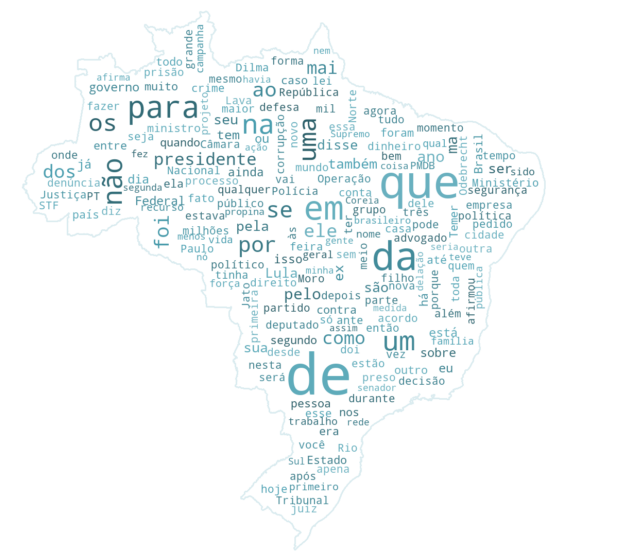

In [7]:
_, all_words, len_all_words = fna.word_cloud_complete(news, "news_text_full", "classification")

* Were computed a total of 4046828 words from dataset.



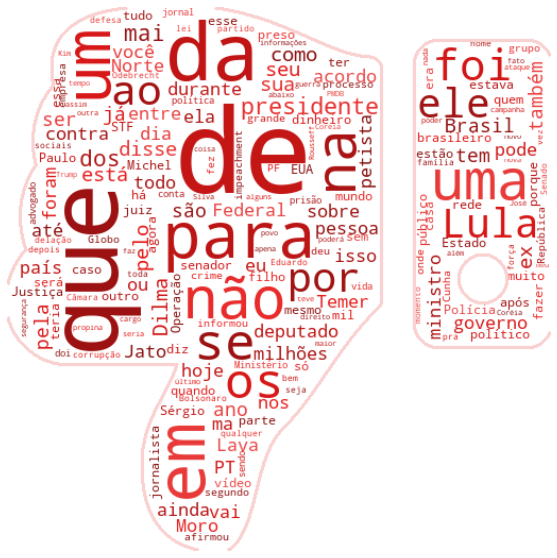

In [8]:
_, fake_words, len_fake_words = fna.word_cloud_fake(news, "news_text_full", "classification")

* Were computed a total of 24024047 words from dataset.



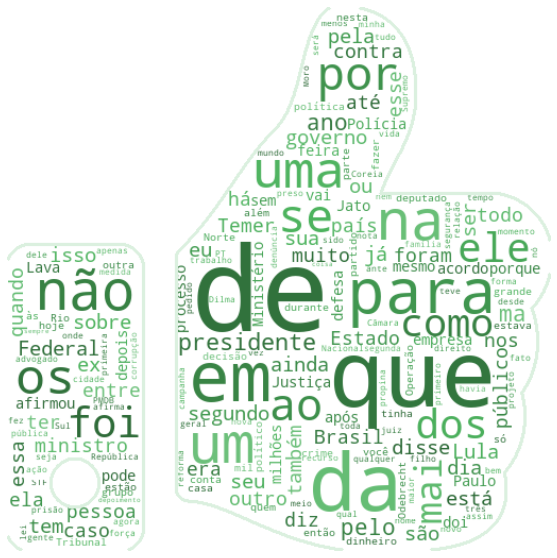

In [9]:
_, real_words, len_real_words = fna.word_cloud_real(news, "news_text_full", "classification")

In [10]:
len(real_words)

24024047

In [11]:
len(news.query('classification == 0'))

3600

In [12]:
news_fake = news.query('classification == 0')
news_real = news.query('classification == 1')
news_fake.head(2)

,Id,news_text_full,news_text_normalized,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,...,number_of_pronouns,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity,Tag,classification
0,1-FAKE,Kátia Abreu diz que vai colocar sua expulsão e...,Kátia Abreu diz que vai colocar sua expulsão e...,mrk,https://ceticismopolitico.com/2017/11/30/katia...,politica,2017-11-30,211,185,120,...,26,2.00000,815,14.2308,4.40541,0.000000,0.263158,0.648649,FAKE,0
2,2-FAKE,Blog esquerdista dá a entender que reclamar de...,Blog esquerdista dá a entender que reclamar de...,None,https://ceticismopolitico.com/2017/11/28/blog-...,sociedade_cotidiano,2017-11-28,356,300,187,...,30,3.29412,1321,17.6471,4.40333,0.013333,0.277372,0.623333,FAKE,0


In [13]:
news_real.head(2)

,Id,news_text_full,news_text_normalized,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,...,number_of_pronouns,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity,Tag,classification
1,1-REAL,O Podemos decidiu expulsar o deputado federal...,O Podemos decidiu expulsar o deputado federal...,Naira Trindade,http://politica.estadao.com.br/blogs/coluna-do...,politica,13/12/2017,168,148,107,...,7,3.33333,761,24.6667,5.14189,0.0,0.134328,0.722973,REAL,1
3,2-REAL,Em evento realizado nesta terça-feira para div...,Em evento realizado nesta terça-feira para div...,Estadão Conteúdo,http://esportes.estadao.com.br/noticias/futebo...,sociedade_cotidiano,26/12/2017,349,294,182,...,29,2.75000,1477,14.7000,5.02381,0.0,0.325758,0.619048,REAL,1


In [14]:
list(news_fake['news_text_full'].head(1))

['Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar. A senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista. “Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu. Ué, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia? Sabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB. Ou seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos. Em tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação patética para a ex-min

In [15]:
list(news_fake['author'].unique())

['mrk',
 'None',
 'Josias Oliveira',
 'Josias Oliveirs',
 'Folha do Brasil',
 'Josias Olveira']

In [16]:
news_fake.groupby('author').count()

,Id,news_text_full,news_text_normalized,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,number_of_links_inside_the_news,...,number_of_pronouns,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity,Tag,classification
author,,,,,,,,,,,,,,,,,,,,,
Folha do Brasil,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Josias Oliveira,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
Josias Oliveirs,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Josias Olveira,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
None,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,...,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528
mrk,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [17]:
news_fake[news_fake.author == 'None'].groupby('author').count()

,Id,news_text_full,news_text_normalized,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,number_of_links_inside_the_news,...,number_of_pronouns,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity,Tag,classification
author,,,,,,,,,,,,,,,,,,,,,
None,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,...,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528


In [18]:
news_real[news_real.author == 'None'].groupby('author').count()

,Id,news_text_full,news_text_normalized,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,number_of_links_inside_the_news,...,number_of_pronouns,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity,Tag,classification
author,,,,,,,,,,,,,,,,,,,,,
None,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47


In [19]:
news["author_score"] = 1

In [20]:
# Criação da coluna "author_score" sendo 1 para autor existente e 0 para notícias sem autor
news["author_score"] = news["author"].replace(["None"], [0])
news["author_score"] = news["author_score"].where(news["author_score"] == 0, 1)

In [21]:
news.head()

,Id,news_text_full,news_text_normalized,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,...,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity,Tag,classification,author_score
0,1-FAKE,Kátia Abreu diz que vai colocar sua expulsão e...,Kátia Abreu diz que vai colocar sua expulsão e...,mrk,https://ceticismopolitico.com/2017/11/30/katia...,politica,2017-11-30,211,185,120,...,2.00000,815,14.2308,4.40541,0.000000,0.263158,0.648649,FAKE,0,1
1,1-REAL,O Podemos decidiu expulsar o deputado federal...,O Podemos decidiu expulsar o deputado federal...,Naira Trindade,http://politica.estadao.com.br/blogs/coluna-do...,politica,13/12/2017,168,148,107,...,3.33333,761,24.6667,5.14189,0.000000,0.134328,0.722973,REAL,1,1
2,2-FAKE,Blog esquerdista dá a entender que reclamar de...,Blog esquerdista dá a entender que reclamar de...,None,https://ceticismopolitico.com/2017/11/28/blog-...,sociedade_cotidiano,2017-11-28,356,300,187,...,3.29412,1321,17.6471,4.40333,0.013333,0.277372,0.623333,FAKE,0,0
3,2-REAL,Em evento realizado nesta terça-feira para div...,Em evento realizado nesta terça-feira para div...,Estadão Conteúdo,http://esportes.estadao.com.br/noticias/futebo...,sociedade_cotidiano,26/12/2017,349,294,182,...,2.75000,1477,14.7000,5.02381,0.000000,0.325758,0.619048,REAL,1,1
4,3-FAKE,"Alckmin diz que por ele PSDB desembarca, mas n...","Alckmin diz que por ele PSDB “desembarca”, mas...",None,https://ceticismopolitico.com/2017/11/28/alckm...,politica,2017-11-28,274,224,150,...,3.57143,1075,16.0000,4.79911,0.000000,0.262136,0.669643,FAKE,0,0


In [22]:
# Contagem de notícias sem autor
news[news.author_score == 0].groupby('classification').count()

,Id,news_text_full,news_text_normalized,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,...,number_of_pronouns,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity,Tag,author_score
classification,,,,,,,,,,,,,,,,,,,,,
0,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,...,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528
1,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47


In [23]:
##################################################################################################################################################################################################################################################################################################

In [24]:
# Unicodes para retirar:
unicodes_to_strip = {
            "\n\n": " ",
            "\n": " ",
            "\ufeff": "",
            "\x85": "",
            "\x91": "",
            "\x92": "",
            "\x93": "",
            "\x94": "",
            "\x96": "",
            "\x97": ""
        }
personalized_simbols = ["“",
                        "”",
                        ",",
                        "”,",
                        '""."',
                        '"),"',
                        '–',
                        'R',
                        '..',
                        '""","',
                        '[...]',
                        ').',
                        '...',
                        '"."""',
                        '),',
                        '".']
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# Conversão da string de pontuações em lista
punctuation_list = list()
for punct in string.punctuation:
    punctuation_list.append(punct)
# Adicionando strings de pontuação que não estão presentes em string.punctuation (“ e ”)
#punctuation = string.punctuation + '“' + '”'
punctuation_simbols_list = punctuation_list + personalized_simbols
punctuation_simbols_list[:10]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [25]:
# TESTE - Decodificar texto já sem acentos nem unicode
with open('data/full_texts/fake/2.txt', 'r', encoding='utf8') as text:
    teste1 = unidecode.unidecode(text.read())
    for key in unicodes_to_strip:
        teste1 = teste1.replace(key, unicodes_to_strip[key])
    #teste1 = text.read()
teste1[:150]

'Blog esquerdista da a entender que reclamar de dedada no futebol e sinal de homofobia. Um texto de Jorge Gauthier, para o blog Me Salte, do jornal Cor'

In [26]:
clean_phrases = list()
tokens_traitement_1 = list()
#stop_words_nltk = set(nltk.corpus.stopwords.words('portuguese'))
stop_words_nltk = set(nltk.tokenize.wordpunct_tokenize(unidecode.unidecode(' '.join(nltk.corpus.stopwords.words('portuguese')))))
for text in news.news_text_full:
    # Decodificar texto sem acentos nem unicode
    news_text = unidecode.unidecode(text)
    for key in unicodes_to_strip:
        # Retira \n e \n\n, principalmente, além dos demais unicodes que possam ter sobrado.
        news_text = news_text.replace(key, unicodes_to_strip[key])
    # Retira stopwords:
    filtered_news = [w for w in nltk.tokenize.wordpunct_tokenize(news_text) if not w in stop_words_nltk]
    # Retira pontuação e deixa todas as palavras em minúsculo:
    filtered_news = [word.lower() for word in filtered_news if not word in (punct for punct in punctuation_simbols_list)]
    filtered_news = [w for w in filtered_news if w.isalpha()]
    filtered_news = [w for w in filtered_news if not w in stop_words_nltk]
    tokens_traitement_1.append(len(filtered_news))
    clean_phrases.append(filtered_news)
# Criar lista com frases tokenizadas e tratadas:
#clean_phrases = [s for s in clean_phrases for w in s if not w in stop_words_nltk]
news['traitement_1'] = clean_phrases
# Criar coluna number_of_tokens_traitement_1
news['number_of_tokens_traitement_1'] = tokens_traitement_1

In [55]:
nltk.tokenize.wordpunct_tokenize("Olá! Eu chamo-me Guilherme.")

['Olá', '!', 'Eu', 'chamo', '-', 'me', 'Guilherme', '.']

In [27]:
news.traitement_1.head()

0    [katia, abreu, diz, vai, colocar, expulsao, mo...
1    [podemos, decidiu, expulsar, deputado, federal...
2    [blog, esquerdista, entender, reclamar, dedada...
3    [evento, realizado, nesta, terca, feira, divul...
4    [alckmin, diz, psdb, desembarca, explica, util...
Name: traitement_1, dtype: object

In [28]:
print("Número médio de palavras antes da retirada das stopwords, pontuações e símbolos:\n\n                                                {:.2f} palavras/tokens por notícia\nsendo:\n\n".format(news.number_of_tokens.mean()))
print("Média de palavras das notícias FALSAS:          {:.2f}\n".format(news.groupby('classification').mean()['number_of_tokens'][0]))
print("Média de palavras das notícias VERDADEIRAS:     {:.2f}\n".format(news.groupby('classification').mean()['number_of_tokens'][1]))#print("Sendo {:.2f} palavras em média para notícias falsas e {:.2f} para verdadeiras.\n\n".format(news.groupby('classification').mean()['number_of_tokens'][0], news.groupby('classification').mean()['number_of_tokens'][1]))
print("Já para o primeiro tratamento, restaram:\n                                                {:.2f} palavras em média por notícia, sendo:\n\n".format(news.number_of_tokens_traitement_1.mean()))
print("Média de palavras das notícias FALSAS:          {:.2f}\n".format(news.groupby('classification').mean()['number_of_tokens_traitement_1'][0]))
print("Média de palavras das notícias VERDADEIRAS:     {:.2f}\n".format(news.groupby('classification').mean()['number_of_tokens_traitement_1'][1]))

Número médio de palavras antes da retirada das stopwords, pontuações e símbolos:

                                                742.76 palavras/tokens por notícia
sendo:


Média de palavras das notícias FALSAS:          216.24

Média de palavras das notícias VERDADEIRAS:     1269.29

Já para o primeiro tratamento, restaram:
                                                362.57 palavras em média por notícia, sendo:


Média de palavras das notícias FALSAS:          106.66

Média de palavras das notícias VERDADEIRAS:     618.48



In [29]:
news[news.author_score == 0].groupby('classification').count()

,Id,news_text_full,news_text_normalized,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,...,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity,Tag,author_score,traitement_1,number_of_tokens_traitement_1
classification,,,,,,,,,,,,,,,,,,,,,
0,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,...,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528
1,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47


In [30]:
print("NÚMERO DE NOTÍCIAS SEM AUTORIA ASSINADA:\n\n")
print("Falsas:          {}".format(news[news.author_score == 0].groupby('classification').count()['Id'][0]))
print("Verdadeiras:     {}".format(news[news.author_score == 0].groupby('classification').count()['Id'][1]))

NÚMERO DE NOTÍCIAS SEM AUTORIA ASSINADA:


Falsas:          3528
Verdadeiras:     47


In [31]:
# Retirando pontuação e números. Deixando todas as palavras em minúsculo
# isalpha() retirou palavras com hífem, números e simbolos úteis. Não usar!
# teste2 = [w.lower() for w in filtered_news if w.isalpha()]

In [32]:
fna.pareto_tokenized(, 10)

SyntaxError: invalid syntax (<ipython-input-32-a13667719476>, line 1)

In [33]:
all_news_words = list()
all_real_news_words = list()
all_fake_news_words = list()
news_fake = news.query('classification == 0')
news_real = news.query('classification == 1')
for news_text in news.traitement_1:
    for word in news_text:
       all_news_words.append(word)

for news_text in news_fake.traitement_1:
    for word in news_text:
       all_fake_news_words.append(word)

for news_text in news_real.traitement_1:
    for word in news_text:       
       all_real_news_words.append(word)


In [34]:
news.traitement_1.tail()

7195    [chefs, convidados, encontro, mundial, cidades...
7196    [anos, nostradamus, previu, vitoria, donald, t...
7197    [licoes, educacao, moral, civica, bamba, abate...
7198    [forcas, armadas, aparecem, pesquisa, institui...
7199    [moraes, filiado, psdb, constitucionalista, in...
Name: traitement_1, dtype: object

Word  Frequency
400      presidente      16906
72               ex      12127
814            lula      11894
223             ser      11242
11            disse      10390
...             ...        ...
739   investigacoes       1649
731           aecio       1646
1986          neste       1644
1430          forca       1638
2611       brasilia       1632

[200 rows x 2 columns]


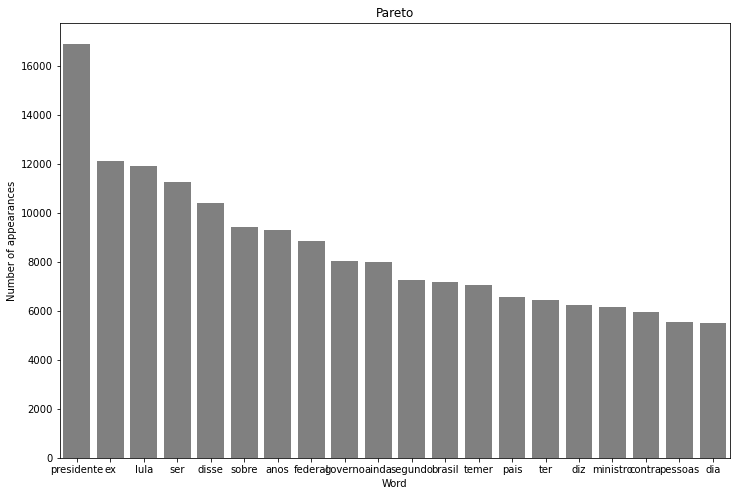

In [35]:
tokens = list()
for news_text in news.traitement_1:
    for word in news_text:
        tokens.append(word)

frequency = nltk.FreqDist(tokens)

df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                            "Frequency": list(frequency.values())})

df_frequency_huge = df_frequency.nlargest(columns = "Frequency", n = 200)
file_name = 'words_frequency_' + time.strftime("%Y%m%d-%H%M%S") + '.txt'
df_frequency_huge.to_csv(file_name)
df_frequency = df_frequency.nlargest(columns = "Frequency", n = 20)

print(df_frequency_huge)
plt. figure(figsize =(12,8))
ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'gray')
ax.set(ylabel = "Number of appearances")
plt.title("Pareto")
plt.show()

In [36]:
nltk.

SyntaxError: invalid syntax (<ipython-input-36-6ed3006e65ac>, line 1)

In [37]:
len(all_fake_news_words)

383979

In [38]:
len(all_real_news_words)

2226538

In [39]:
news[:1]

,Id,news_text_full,news_text_normalized,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,...,average_sentence_length,average_word_length,percentage_of_news_with_speeling_errors,emotiveness,diversity,Tag,classification,author_score,traitement_1,number_of_tokens_traitement_1
0,1-FAKE,Kátia Abreu diz que vai colocar sua expulsão e...,Kátia Abreu diz que vai colocar sua expulsão e...,mrk,https://ceticismopolitico.com/2017/11/30/katia...,politica,2017-11-30,211,185,120,...,14.2308,4.40541,0.0,0.263158,0.648649,FAKE,0,1,"[katia, abreu, diz, vai, colocar, expulsao, mo...",98
